# Prevision of Critics Review Scores for Music Albums
### EIACD Assignment 2 - Group 'Media K'

#### Ana Pinto (202105085) /  Fani Neto (199000325)


<a id="Index"></a>

### Index

1. [Goals](#Goal)<br>
2. [Introduction](#Intro)<br>
3. [Data Exploration](#Exploration)<br>
    3.1. [Loading and characterization of the dataset](#Loading)<br>
4. [Data Pre-processing](#Preprocessing)<br>
5. [Classification](#Classification)<br>
      5.1. [Decision Tree](#DT)<br>
      5.2. [K Nearest Neighbors](#KNN)<br>
6.[Conclusions](#Conclusions)<br>
7.[Log Changes](#Log_changes)<br>
8.[References](#References)<br>

<a id='Goal'></a>


## 1. Goals
[[ go back to the top ]](#Index)

### By using **machine supervised learning classification algorithms**, predict if a certain **music album** has good or bad critic reviews, according to four scores: **bad**, **mediocre**, **good**, or **great** . 

#### Learning goal: handle a classification analysis (supervised learning) from scratch, including data exploration, pre-processing, data engeneering (manipulation / simplification), evaluation and choice of learning algorithms.

<a id="Intro"></a>

## 2. Introduction
[[ go back to the top ]](#Index)

Supervised learning is a machine learning approach in which an algorithm learns from a dataset of labeled data to make predictions or decisions. It involves training a model on input-output pairs in a subset of the dataset. The inputs are the features or attributes of the data, used as predictors, and the outputs are the corresponding labels or target values.

**Classification** is one type of supervised learning that involves categorizing data into predefined classes or categories based on their characteristics. Commom classification algorithms include **decision trees**, **k_nearest neighbors (kNN)** random forests, support vector machines (SVM), logistic regression, and neural networks. The algorithm learns from labeled training data to predict the class labels of unseen or new instances.

The quality and representativeness of the data, and the choice of the model and its parameters, can greatly affect the performance of the supervised learning task.

The process of classification typically includes the following steps:

    - Data collection: collect a dataset containing labeled examples, where each example consists of a set of features and their corresponding labels. 

    - Data exploration and preprocessing: characterize the data in terms of distribution, outliers, balanced ***vs.*** imbalanced and prepare the data for training by performing various preprocessing steps(cleaning, normalizing, scaling, assigning labels to the target variable, etc. This ensures that the data is in a format suitable for the learning algorithm.

    - Model selection: select an appropriate model or algorithm. This depends on the nature of the data and the task. Most common models used for classification in supervised learning include decision trees, support vector machines, logistic regression, and neural networks.

    - Feature extraction/selection: extract relevant features in the dataset or select a subset of features that are most informative for the learning task. This reduces the dimensionality of the data and improves the performance of the model.

    - Train the model: labeled training examples are presented to the model. The model learns from the input-output pairs and adjusts its internal parameters to minimize the prediction error. 

    - Evaluating the model: evaluate the performance of the model on unseen data to assess its generalization ability. This is usually done using a separate validation or test set. Common evaluation metrics include accuracy, precision, recall and F1 score.

    - Deploying the model: deploy the model to make predictions for new unseen data. The deployed model takes the features of the new data as input and produces predicted labels or values as output.



<a id="Exploration"></a>

## 3. Data Exploration
[[ go back to the top ]](#Index)


In [35]:
#for graphics and formatting

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Patch

import graphviz
from IPython.display import display, Markdown, display_html, clear_output

# machine learning required modules

import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,cross_validate, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve,precision_score, recall_score, classification_report, f1_score, pairwise_distances
from sklearn.tree import export_graphviz
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor

import warnings
warnings.filterwarnings("ignore")




<a id="Loading"></a>

### 3.1 Loading and characterization the dataset
[[ go back to the top ]](#Index)

In [36]:
# reading the 'albums.csv' dataset into a dataframe

df = pd.read_csv("albums.csv")
df.shape

(5000, 12)

In [37]:
# looking at the first 5 and last 5 rows of the dataframe checking if types match data (looking for unformatted entries)
df

,Unnamed: 0,position,release_name,artist_name,release_date,release_type,primary_genres,secondary_genres,descriptors,avg_rating,rating_count,review_count
0,1,1,OK Computer,Radiohead,1997-06-16,album,"Alternative Rock, Art Rock",NaN,"melancholic, anxious, futuristic, malevocals, ...",4.24,74027,1541
1,2,2,Kid A,Radiohead,2000-10-03,album,"Art Rock, Experimental Rock, Electronic","Ambient, Electronic, IDM","cold, melancholic, futuristic, anxious, atmosp...",4.23,61658,751
2,3,3,The Dark Side of the Moon,Pink Floyd,1973-03-23,album,"Art Rock, Progressive Rock","Psychedelic Rock, Space Rock","philosophical, atmospheric, introspective, exi...",4.21,60192,1557
3,4,4,Loveless,My Bloody Valentine,1991-11-11,album,"Shoegaze, Noise Pop","Dream Pop, Neo-Psychedelia","noisy, ethereal, atmospheric, romantic, love, ...",4.24,53174,1264
4,5,5,My Beautiful Dark Twisted Fantasy,Kanye West,2010-11-22,album,"Pop Rap, Hip Hop",Art Pop,"epic, boastful, passionate, sampling, hedonist...",4.09,52149,638
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,4996,Copia,Eluvium,2007-02-20,album,Ambient,"Modern Classical, Post-Minimalism","instrumental, atmospheric, bittersweet, sentim...",3.44,2171,63
4996,4997,4997,Let Mortal Heroes Sing Your Fame,Summoning,2001-10-31,album,"Atmospheric Black Metal, Symphonic Black Metal",Dungeon Synth,"fantasy, epic, triumphant, melodic, atmospheri...",3.73,2170,20
4997,4998,4998,Dangerous Days,Perturbator,2014-06-17,album,"Darksynth, Horror Synth, Synthwave",Electro-Industrial,"futuristic, ominous, sciencefiction, atmospher...",3.50,2170,21
4998,4999,4999,Third Ear Band,Third Ear Band,1970-06-01,album,"Progressive Folk, Free Folk","Drone, Free Improvisation","instrumental, ritualistic, hypnotic, atmospher...",3.63,2169,39


In [38]:
# Checking the dtypes
print(df.dtypes)

# counting the number of numerical and categorical attributes
        
count_categ = 0
count_numer = 0
for column in df.columns:
    if df[column].dtypes == 'object':
        count_categ += 1
    if df[column].dtypes == 'int64' or df[column].dtypes == 'float64':
        count_numer += 1

display(Markdown(f"#### **There are <font color='green'> {count_numer} numerical </font> attributes** and  <font color='red'> {count_categ} categorical</font> **attributes**."))
#print('\n\nThere are', count_numer, 'numerical attributes and', count_categ, 'categorical attributes.')
        

Unnamed: 0            int64
position              int64
release_name         object
artist_name          object
release_date         object
release_type         object
primary_genres       object
secondary_genres     object
descriptors          object
avg_rating          float64
rating_count          int64
review_count          int64
dtype: object


#### **There are <font color='green'> 5 numerical </font> attributes** and  <font color='red'> 7 categorical</font> **attributes**.

In [39]:
# obtaining information about the dataset: number of instances, number of attributes, null values (missing values), dtype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5000 non-null   int64  
 1   position          5000 non-null   int64  
 2   release_name      5000 non-null   object 
 3   artist_name       5000 non-null   object 
 4   release_date      5000 non-null   object 
 5   release_type      5000 non-null   object 
 6   primary_genres    4999 non-null   object 
 7   secondary_genres  4505 non-null   object 
 8   descriptors       5000 non-null   object 
 9   avg_rating        5000 non-null   float64
 10  rating_count      5000 non-null   int64  
 11  review_count      5000 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 468.9+ KB


Counting the number of **'null values**' in each attribute


In [40]:
#Calculating the number of distinct (unique) values for each column 

nr_unique_values = df.nunique()
print('\n\033[1m\033[4m\033[32mNumber of unique values in each variable:\033[0m\n\n', nr_unique_values)



Number of unique values in each variable:

 Unnamed: 0          5000
position            5000
release_name        4938
artist_name         2090
release_date        3271
release_type           1
primary_genres      2245
secondary_genres    3371
descriptors         4997
avg_rating           244
rating_count        3552
review_count         443
dtype: int64


In [41]:
#Checking the number of **'NaN'**' values in each attribute


def count_nan(df):
    nan_counts = df.isna().sum()

    print('\n\033[1m\033[4m\033[32mNaN counts for each attribute:\033[0m\n\n')
    print(nan_counts)
    
count_nan(df)    
    


NaN counts for each attribute:


Unnamed: 0            0
position              0
release_name          0
artist_name           0
release_date          0
release_type          0
primary_genres        1
secondary_genres    495
descriptors           0
avg_rating            0
rating_count          0
review_count          0
dtype: int64


In [42]:
#counting the number of missing values

def count_missing_values(df):
    missing_value_counts = df.isnull().sum()

    print('\n\033[1m\033[4m\033[32mMissing value counts for each attribute:\033[0m\n\n')
    print(missing_value_counts)
    
count_missing_values(df)


Missing value counts for each attribute:


Unnamed: 0            0
position              0
release_name          0
artist_name           0
release_date          0
release_type          0
primary_genres        1
secondary_genres    495
descriptors           0
avg_rating            0
rating_count          0
review_count          0
dtype: int64


#### Searching for outliers

We will look at the data distribution for each numerical variable, in order to find out outliers and noise.

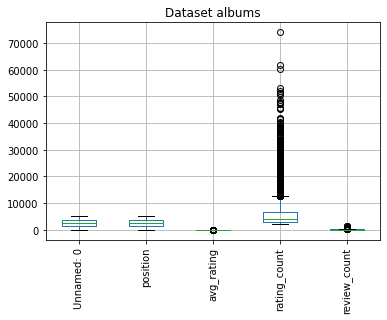

In [43]:
#noise and outliers

num_var = ['Unnamed: 0', 'position', 'avg_rating','rating_count', 'review_count']

plt.figure()
df[num_var].boxplot()
plt.title(f"Dataset albums")
plt.xticks(rotation='vertical')
plt.show()
    


### Dataset characterization results
#### Variable dtypes:
The dataset is composed of 5 numerical and 7 categorical attributes. <br>
No unformatted entries were found, thus dataset was preserved.<br>

#### Missing values:

   **categorical variables**:

    - 'primary_genres': 1
    -  "secondary_genres": 495
        
   **numerical variables**:

    - there are **no missing values**

#### Outliers
    - there is a **high number of outliers** in the numerical variable **"rating_count"**.




In [44]:
# descriptive statistics of all attributes

df.describe(include='all')

,Unnamed: 0,position,release_name,artist_name,release_date,release_type,primary_genres,secondary_genres,descriptors,avg_rating,rating_count,review_count
count,5000.000000,5000.000000,5000,5000,5000,5000,4999,4505,5000,5000.000000,5000.000000,5000.00000
unique,NaN,NaN,4938,2090,3271,1,2245,3371,4997,NaN,NaN,NaN
top,NaN,NaN,Peter Gabriel,Bob Dylan,1972-01-01,album,Alternative Rock,Hard Rock,"malevocals, energetic, rhythmic, rebellious, a...",NaN,NaN,NaN
freq,NaN,NaN,4,25,10,5000,80,34,2,NaN,NaN,NaN
mean,2500.500000,2500.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.540424,6083.700800,101.30200
std,1443.520003,1443.520003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.374449,5899.645056,106.48523
min,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.620000,2169.000000,6.00000
25%,1250.750000,1250.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.410000,2830.000000,44.00000
50%,2500.500000,2500.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.620000,3973.000000,72.00000
75%,3750.250000,3750.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.770000,6736.750000,117.00000


<a id="Preprocessing"></a>

## 4. Data Pre-processing 
[[ go back to the top ]](#Index)

PREPROCESSING strategy:       
   - The variables **"Unnamed: 0"**  and **'position'** represent **unique ID values**, so they should be excluded from the dataset since they are meaningless for the classification.
   - The variable **'release_type'** shows an unique category across the whole dataset ('album'), and therefore it is also meaningless for the classification. It will also be dropped out from the dataset.
   - The variables  **'primary_genres'** and **"secondary_genres"** have 1 missing value and 495 missing values, respectivelly; because they also have a very high number of unique instances they do not seem to be relevant for classification, and we will drop out these missing values.
    

In [45]:
# dropping the columns 'Unnamed: 0', 'position' and 'release_type'

df = df.drop(['Unnamed: 0', 'position', 'release_type'], axis=1)

#checking the first 5 rows to verify if the columns have been dropped
df.head()



,release_name,artist_name,release_date,primary_genres,secondary_genres,descriptors,avg_rating,rating_count,review_count
0,OK Computer,Radiohead,1997-06-16,"Alternative Rock, Art Rock",NaN,"melancholic, anxious, futuristic, malevocals, ...",4.24,74027,1541
1,Kid A,Radiohead,2000-10-03,"Art Rock, Experimental Rock, Electronic","Ambient, Electronic, IDM","cold, melancholic, futuristic, anxious, atmosp...",4.23,61658,751
2,The Dark Side of the Moon,Pink Floyd,1973-03-23,"Art Rock, Progressive Rock","Psychedelic Rock, Space Rock","philosophical, atmospheric, introspective, exi...",4.21,60192,1557
3,Loveless,My Bloody Valentine,1991-11-11,"Shoegaze, Noise Pop","Dream Pop, Neo-Psychedelia","noisy, ethereal, atmospheric, romantic, love, ...",4.24,53174,1264
4,My Beautiful Dark Twisted Fantasy,Kanye West,2010-11-22,"Pop Rap, Hip Hop",Art Pop,"epic, boastful, passionate, sampling, hedonist...",4.09,52149,638


We have to rate (classify) the albums in **"great"**, **"good"**, **"mediocre"** and **"bad"**. To do this, we will create a **new variable**, called ***'rating_imbalanced'***, according to the values in variable **avg_rating**:
 - "bad": avg_rating > 2.0
 - "mediocre": 2.0 <= avg_rating < 3.0
 - "good": 3.0<= avg_rating < 4.0
 - "great": avg_rating >= 4.0

In [46]:

def rating_category(avg_rating):
    if avg_rating < 2.0:
        return 'bad'
    elif 2.0 <= avg_rating < 3.0:
        return 'mediocre'
    elif 3.0<= avg_rating < 4.0:
        return 'good'
    else:
        return 'great'

# add column 'rating' to DataFrame
df['rating_imbalanced'] = df['avg_rating'].apply(rating_category)



In [47]:
df.head(50)

,release_name,artist_name,release_date,primary_genres,secondary_genres,descriptors,avg_rating,rating_count,review_count,rating_imbalanced
0,OK Computer,Radiohead,1997-06-16,"Alternative Rock, Art Rock",NaN,"melancholic, anxious, futuristic, malevocals, ...",4.24,74027,1541,great
1,Kid A,Radiohead,2000-10-03,"Art Rock, Experimental Rock, Electronic","Ambient, Electronic, IDM","cold, melancholic, futuristic, anxious, atmosp...",4.23,61658,751,great
2,The Dark Side of the Moon,Pink Floyd,1973-03-23,"Art Rock, Progressive Rock","Psychedelic Rock, Space Rock","philosophical, atmospheric, introspective, exi...",4.21,60192,1557,great
3,Loveless,My Bloody Valentine,1991-11-11,"Shoegaze, Noise Pop","Dream Pop, Neo-Psychedelia","noisy, ethereal, atmospheric, romantic, love, ...",4.24,53174,1264,great
4,My Beautiful Dark Twisted Fantasy,Kanye West,2010-11-22,"Pop Rap, Hip Hop",Art Pop,"epic, boastful, passionate, sampling, hedonist...",4.09,52149,638,great
5,In Rainbows,Radiohead,2007-10-10,"Art Rock, Alternative Rock","Electronic, Dream Pop, Art Pop","lush, malevocals, introspective, melancholic, ...",4.20,51335,752,great
6,Wish You Were Here,Pink Floyd,1975-09-12,"Progressive Rock, Art Rock","Space Rock, Psychedelic Rock","melancholic, atmospheric, progressive, malevoc...",4.30,51246,1006,great
7,In the Aeroplane Over the Sea,Neutral Milk Hotel,1998-02-10,"Indie Folk, Indie Rock","Psychedelic Folk, Singer-Songwriter, Lo-Fi/Sla...","passionate, poetic, death, cryptic, surreal, b...",4.09,50353,983,great
8,The Bends,Radiohead,1995-03-13,Alternative Rock,Britpop,"melancholic, lonely, melodic, anxious, introsp...",3.84,48578,798,good
9,To Pimp a Butterfly,Kendrick Lamar,2015-03-15,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","Political Hip Hop, Neo-Soul, Funk, Poetry, Exp...","political, conscious, poetic, conceptalbum, pr...",4.30,47821,415,great


good        4448
mediocre     327
great        181
bad           44
Name: rating_imbalanced, dtype: int64


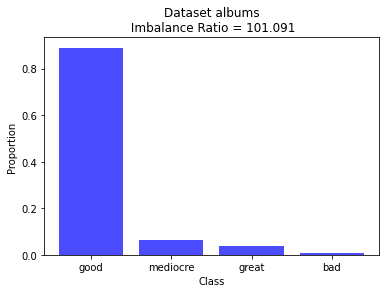

In [48]:
#count ratings

rating_counts = df['rating_imbalanced'].value_counts()
df['rating_imbalanced']= df['avg_rating'].apply(rating_category)

lst = rating_counts.tolist()
imbalance_ratio = max(lst)/min(lst) 
rating_proportions = df['rating_imbalanced'].value_counts(normalize=True)
  
print(rating_counts)

# Plot the rating_counts in percentage (proportion) per class
#plt.figure(figsize=(8, 4))
#plt.subplot(1, 2, 1)
plt.bar(rating_proportions.index, rating_proportions.values, color='blue', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title(f"Dataset albums\n Imbalance Ratio = {imbalance_ratio:.3f}")

    
# Show the plot
plt.show()








The variable ***'rating_imbalanced'*** will be the variable that we will use to classify the albums in the dataset, that is, the **target variable**. 

As observed above, we have a highly ***imbalanced multiclass target value***.

Thus, we will try a different approach, by assigning each of the four ratings to the **quartiles** in the distribution of the **avg_rating variable**, in order to get a more **balanced** target variable.

q1 = 3.410000
q2 = 3.620000
q3 = 3.770000



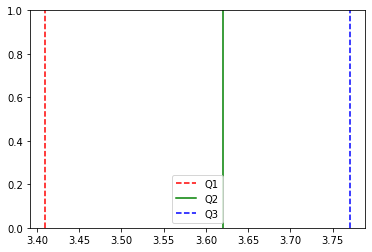

In [49]:
q1 = df['avg_rating'].quantile(0.25)  # 25th percentile / 1st quartile
q2 = df['avg_rating'].quantile(0.50)  # Median / 2nd quartile
q3 = df['avg_rating'].quantile(0.75)  # 75th percentile / 3rd quartile

# Add vertical lines for the quantiles
plt.axvline(x=q1, color='r', linestyle='--', label='Q1')
plt.axvline(x=q2, color='g', linestyle='-', label='Q2')
plt.axvline(x=q3, color='b', linestyle='--', label='Q3')

print('q1 = %f\nq2 = %f\nq3 = %f\n' %(q1,q2,q3))
plt.legend()
plt.show()


good        1284
great       1275
bad         1222
mediocre    1219
Name: rating, dtype: int64


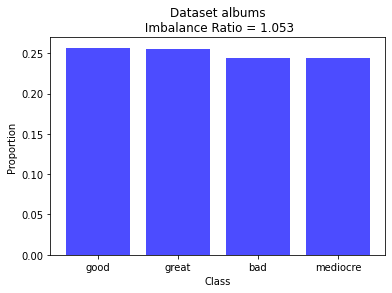

In [50]:

def new_rating_category(avg_rating):
    if avg_rating < q1:
        return 'bad'
    elif q1 <= avg_rating < q2:
        return 'mediocre'
    elif q2 <= avg_rating < q3:
        return 'good'
    else:
        return 'great'


    
df['rating'] = df['avg_rating'].apply(new_rating_category)

rating_counts = df['rating'].value_counts()

lst = rating_counts.tolist()
imbalance_ratio = max(lst)/min(lst) 
rating_proportions = df['rating'].value_counts(normalize=True)
  

print(rating_counts)

# Plot the rating_counts in percentage (proportion) per class
#plt.figure(figsize=(8, 4))
#plt.subplot(1, 2, 1)
plt.bar(rating_proportions.index, rating_proportions.values, color='blue', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title(f"Dataset albums\n Imbalance Ratio = {imbalance_ratio:.3f}")

    
# Show the plot
plt.show()


#### Looking at the data

In [51]:
# confirming number of classes in variable "rating"
df.rating.nunique()

4

In [52]:
# confirming dtype of variable "rating"
print(df['rating'].dtype)

object


#### Dealing with missing values

The dataset has **missing values** in variables **"primary_genres"** (***1 missing value***) and **"secondary_genres"** (***495 missing values***). Additionally some .csv files with missing values have "?" instead of NaN. We will start by replacing the eventual exhisting "?" by NaN.

Given that the 495 missing values represent only **9.9% of the total dataset instances***, we decided to drop out these instances as well as the missing value in "primary_genres".

In [53]:
df.replace('?', float("NaN"), inplace=True)
if df.isnull().values.any():
    n1 = len(df)
    #Drop rows with NaN values
    df.dropna(inplace=True)
display(Markdown(f"#### **Dropped <font color='green'> {n1 - len(df)} instances**</font> in the dataset out of a total of {n1} instances due to <font color='red'>**missing values**</font>."))


#### **Dropped <font color='green'> 497 instances**</font> in the dataset out of a total of 5000 instances due to <font color='red'>**missing values**</font>.

#### Understanding the distribution of the attributes by each class in variable **"rating"**

In [54]:
# looking at the means for numerical attributes
df.groupby('rating').mean()


,avg_rating,rating_count,review_count
rating,,,
bad,3.045785,4331.564126,76.268161
good,3.689067,5369.601900,87.444732
great,3.885505,10325.604693,166.670578
mediocre,3.521346,4674.094474,73.046346


In [55]:
#get the most frequent value (mode) for each categorical column within each rating group
categorical_columns = ['release_name', 'artist_name', 'primary_genres', 'secondary_genres', 'descriptors']


mean_categorical = df.groupby('rating')[categorical_columns].apply(lambda x: x.mode().iloc[0])
mean_categorical_table = pd.DataFrame(mean_categorical)

mean_categorical_table





,release_name,artist_name,primary_genres,secondary_genres,descriptors
rating,,,,,
bad,Honeymoon,Green Day,Alternative Rock,Alternative Rock,"malevocals, energetic, rhythmic, rebellious, a..."
good,Houdini,Katatonia,Indie Rock,Progressive Rock,"Christian, dark, heavy, malevocals, apocalypti..."
great,Juju,Miles Davis,Progressive Rock,Progressive Metal,"Christian, religious, epic, apocalyptic, malev..."
mediocre,Devotion,The Beach Boys,Alternative Rock,Heavy Metal,"Christian, malevocals, spiritual, atmospheric,..."


In [56]:
# Create a new column 'numerical_rating' with the numerical ratings

df['numerical_rating'] = df['rating'].map({'bad': 1, 'mediocre': 2, 'good': 3, 'great': 4})

df.head()

#print(df['rating'].dtype)

# Create a new column 'numerical_rating_imbal' with the numerical ratings for the rating_imbalanced

df['numerical_rating_imbal'] = df['rating_imbalanced'].map({'bad': 1, 'mediocre': 2, 'good': 3, 'great': 4})

df.head()

#print(df['rating'].dtype)

,release_name,artist_name,release_date,primary_genres,secondary_genres,descriptors,avg_rating,rating_count,review_count,rating_imbalanced,rating,numerical_rating,numerical_rating_imbal
1,Kid A,Radiohead,2000-10-03,"Art Rock, Experimental Rock, Electronic","Ambient, Electronic, IDM","cold, melancholic, futuristic, anxious, atmosp...",4.23,61658,751,great,great,4,4
2,The Dark Side of the Moon,Pink Floyd,1973-03-23,"Art Rock, Progressive Rock","Psychedelic Rock, Space Rock","philosophical, atmospheric, introspective, exi...",4.21,60192,1557,great,great,4,4
3,Loveless,My Bloody Valentine,1991-11-11,"Shoegaze, Noise Pop","Dream Pop, Neo-Psychedelia","noisy, ethereal, atmospheric, romantic, love, ...",4.24,53174,1264,great,great,4,4
4,My Beautiful Dark Twisted Fantasy,Kanye West,2010-11-22,"Pop Rap, Hip Hop",Art Pop,"epic, boastful, passionate, sampling, hedonist...",4.09,52149,638,great,great,4,4
5,In Rainbows,Radiohead,2007-10-10,"Art Rock, Alternative Rock","Electronic, Dream Pop, Art Pop","lush, malevocals, introspective, melancholic, ...",4.20,51335,752,great,great,4,4


Boxplotting the distribution of each numerical variable by each "numerical_rating" score.

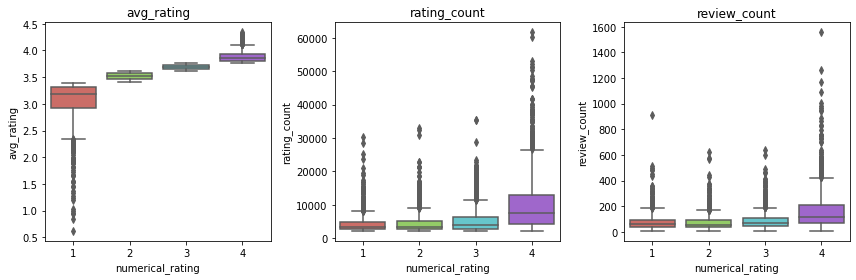

In [57]:
numeric_columns = ['avg_rating', 'rating_count', 'review_count']
# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(12, 4))

# Plot boxplots for each attribute
for i, column in enumerate(numeric_columns):
    sns.boxplot(x='numerical_rating', y=column, data=df, palette='hls', order=[1, 2, 3, 4], ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()
plt.show()


#### Encoding of categorical variables

,release_name,artist_name,release_date,primary_genres,secondary_genres,descriptors,avg_rating,rating_count,review_count,rating_imbalanced,rating,numerical_rating,numerical_rating_imbal
1,1956,1307,1593,243,209,547,4.23,61658,751,great,great,4,4
2,3556,1257,356,253,2762,3351,4.21,60192,1557,great,great,4,4
3,2144,1106,1085,1792,984,3148,4.24,53174,1264,great,great,4,4
4,2375,863,2253,1440,263,1200,4.09,52149,638,great,great,4,4
5,1806,1307,2053,238,1115,2032,4.20,51335,752,great,great,4,4


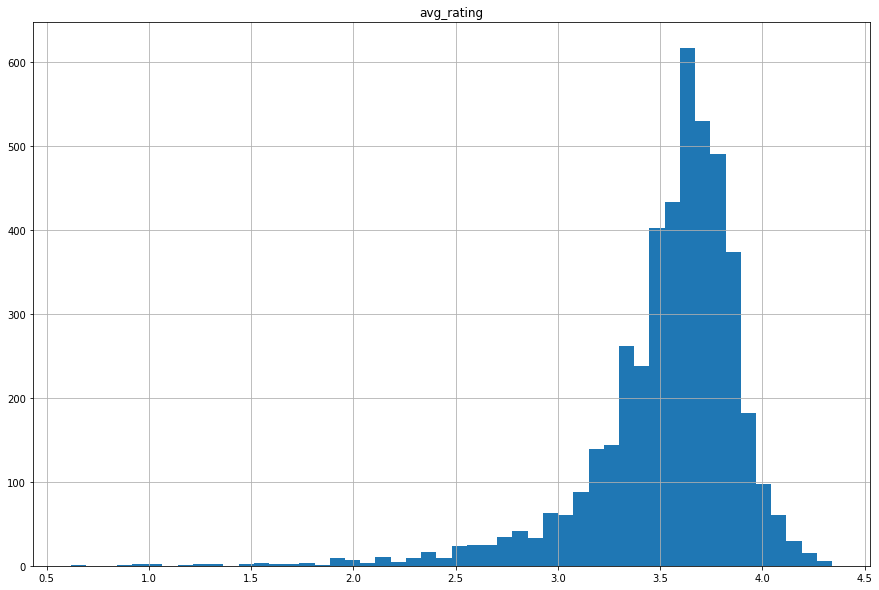

In [58]:
le = LabelEncoder()
cols = ['artist_name', 'release_name', 'release_date', 'primary_genres', 'secondary_genres', 'descriptors']
for col in cols:
    df[col] = le.fit_transform(df[col])
    
#df.rating = df['rating'].map({'bad': 1, 'mediocre': 2, 'good': 3, 'great': 4})

df.hist('avg_rating',bins=50, figsize=(15,10))
df.head()



In [59]:
# checking if enconding was sucessfull
df.dtypes

release_name                int32
artist_name                 int32
release_date                int32
primary_genres              int32
secondary_genres            int32
descriptors                 int32
avg_rating                float64
rating_count                int64
review_count                int64
rating_imbalanced          object
rating                     object
numerical_rating            int64
numerical_rating_imbal      int64
dtype: object

#### Checking for correlations between each variable and the target variable **"rating"**.

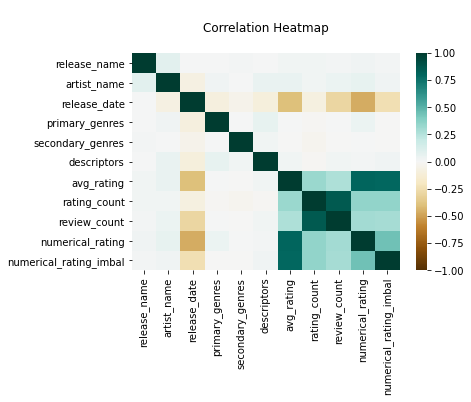

In [60]:
df.corr()['numerical_rating'].sort_values(ascending=False)

#visualize correlations using heatmap
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='BrBG')
heatmap.set_title('\nCorrelation Heatmap\n')


plt.show()



The variables **"release_name"**, **'artist_name'**, **'primary_genres'**, **'secondary_genres'** and **'descriptors'** have none or very poor correlation with the target variable (**'numerical_rating'**).

Only variables **`release_date'**, **'avg_rating'** (as expected), **'rating_count'** and **'review_count'** seem to be relevant for classification.

<a id='Classification'></a>

# 5. Classification
[[ go back to the top ]](#Index)

<a id='DT'></a>


## 5.1. Decision Trees
[[ go back to the top ]](#Index)


A decision tree is one of the supervised machine learning algorithms. This algorithm can be used for regression and classification problems — yet, is mostly used for classification problems. A decision tree follows a set of if-else conditions to visualize the data and classify it according to the conditions.


**Root Node**: This attribute is used for dividing the data into two or more sets.

**Branch or Sub-Tree**: A part of the entire decision tree is called a branch or sub-tree.

**Splitting**: Dividing a node into two or more sub-nodes based on if-else conditions.

**Decision Node**: After splitting the sub-nodes into further sub-nodes, then it is called the decision node.

**Leaf or Terminal Node**: This is the end of the decision tree where it cannot be split into further sub-nodes.

**Pruning**: Removing a sub-node from the tree is called pruning.

![Decision Tree](DecisionTree.png)






### Defining the set of predictors, X, and the target variable, y

As observed in the **correlation heatmap**, the variables **"release_name"**, **"artist_name"**, **"primary_genres"**, **"secondary_genres"** and **"descriptors"** have ***unsignificant*** correlation with the target variable **rating**, and they will be dropped from the our set of predictor variables.

Equally, the variable **avg_rating** is ***highly correlated*** with the target variable **"rating"**, **"rating_imbalanced"**, **"numerical_rating"** and **"numercial_rating_imbal"**, as expected, since it was used to define these new variables. Thus, it also will not be used in the set of predictors.

In [61]:
X = df.drop(["release_name", "artist_name", "primary_genres", "secondary_genres","descriptors", "avg_rating", "rating", "numerical_rating", 'rating_imbalanced','numerical_rating_imbal'], axis=1)
print('\nX shape =', X.shape)
print(X.head())

y_imbalanced = df['numerical_rating_imbal'] # for building a Decision tree also for the imbalanced rating
y= df['numerical_rating']
print('\ny shape =', y.shape)
print(y.head())


X shape = (4503, 3)
   release_date  rating_count  review_count
1          1593         61658           751
2           356         60192          1557
3          1085         53174          1264
4          2253         52149           638
5          2053         51335           752

y shape = (4503,)
1    4
2    4
3    4
4    4
5    4
Name: numerical_rating, dtype: int64


### Building the Decision Tree

#### Dividing the data into train and test subsets

We will first use a **70/30 holdout** approach to divide the data.

In [62]:

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size= 0.3, random_state=1234, stratify = y)

# also for y_imbalanced, which is built on imbalanced 'numerical_rating_imbal' variable 

X_imbal_train,X_imbal_test,y_imbalanced_train,y_imbalanced_test = train_test_split(X, y_imbalanced, test_size= 0.3, random_state=1234, stratify = y)

print(X_train)

      release_date  rating_count  review_count
2579          1847          3868           156
4123          2540          2598            14
3963          2379          2690            44
688           1901          9981           217
3925          1273          2718            27
...            ...           ...           ...
3104          2982          3327            38
1606           826          5717           129
3587           160          2942            87
4536           202          2393            26
770            911          9300           142

[3152 rows x 3 columns]


#### We wil first build the tree by using the **'y_imbalanced'**  set as target, which is built on the **'numerical_rating_imbal'** variable. This will serve to evaluate how an imbalanced target affects the decision tree when compared with a balanced target.

 We will first check out how Accuracy depends on decision tree depth and minimum number of samples in split for the imbalanced, **'y_imbalanced'**, target.


Splitting criterion:  gini


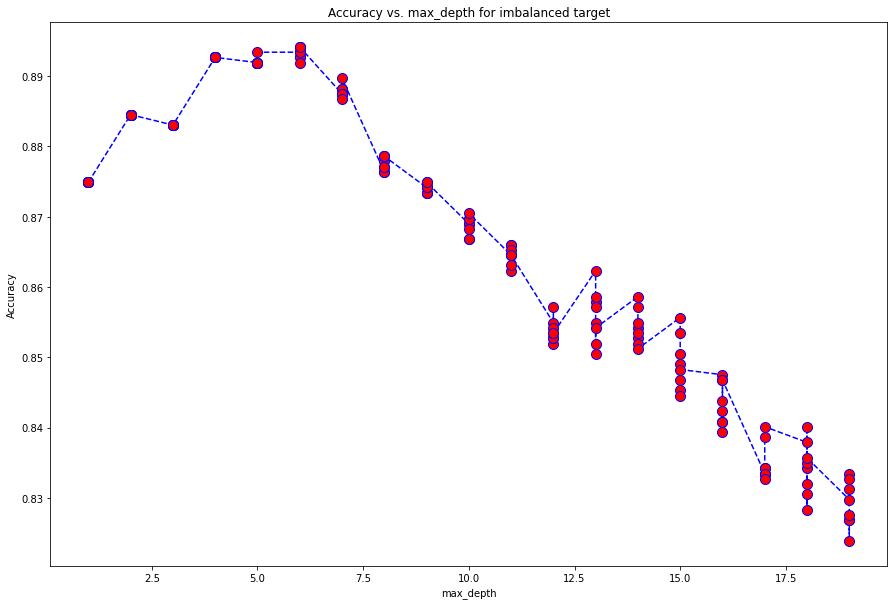

In [63]:
# apply decision tree for a range of maximum depth between 1 and 20 
# and a minimum number of samples in split between 2 and 10
# print accuracy

x_imb_values = []
y_imb_values = []
classif_imbal_score=[]
for i in range (1,20):
    for j in range (2,10):
        # Create the classifier
        dtree_imbal = DecisionTreeClassifier(max_depth=i, min_samples_split=j)
    
        # Train the classifier on the training set
        dtree_imbal.fit(X_imbal_train,y_imbalanced_train)
        
        # Validate the classifier on the testing set using classification accuracy
        y_imbalanced_pred = dtree_imbal.predict(X_imbal_test)
       # print('\nAccuracy = ', accuracy_score(y_imbalanced_test,y_imbalanced_pred), '\n')

        classif_imbal =accuracy_score(y_imbalanced_test,y_imbalanced_pred)
        
        # Append x and y values to the lists
        x_imb_values.append(i)
        y_imb_values.append(classif_imbal)
        
        # Append max_depth, min_samples_split, accuracy to the list
        classif_imbal_score.append ((i,j,classif_imbal))
        #print( classif_imbal_score)
        
# checking the split criterion of DecisionTreeClassifier
print('\nSplitting criterion: ',dtree_imbal.criterion) 



# plotting how accuracy changes with max_depth for different min_samples_split       
plt.figure(figsize=(15, 10))
plt.plot(x_imb_values,y_imb_values ,color='blue', linestyle='dashed', marker='o', 
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. max_depth for imbalanced target')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()


In [64]:
best_accuracy_imb = max(classif_imbal_score, key=lambda x: x[2])
best_max_depth_imb = best_accuracy_imb[0]
best_min_samples_split_imb = best_accuracy_imb[1]

print("Best max_depth_imb:", best_max_depth_imb)
print("Best min_samples_split_imb:", best_min_samples_split_imb)
print("Best accuracy for imbalanced target:", best_accuracy_imb[2])


Best max_depth_imb: 6
Best min_samples_split_imb: 3
Best accuracy for imbalanced target: 0.8941524796447077


In [65]:

# Create the classifier with the Best max_depth: 2 and Best min_samples_split: 2
dtree_imbal_best = DecisionTreeClassifier(max_depth=best_max_depth_imb, min_samples_split= best_min_samples_split_imb)

# Train the classifier on the training set
dtree_imbal_best.fit(X_imbal_train,y_imbalanced_train)

best_pred_imb = dtree_imbal_best.predict(X_imbal_test)
ac_s_imb = accuracy_score(y_imbalanced_test,best_pred_imb)
print ('\nBest accuracy score for imbalanced target  = ', ac_s_imb, '\n')
classes = dtree_imbal_best.classes_
print ('Classes = ', classes, '\n')
print(X)




Best accuracy score for imbalanced target  =  0.8926720947446336 

Classes =  [1 2 3 4] 

      release_date  rating_count  review_count
1             1593         61658           751
2              356         60192          1557
3             1085         53174          1264
4             2253         52149           638
5             2053         51335           752
...            ...           ...           ...
4995          2005          2171            63
4996          1662          2170            20
4997          2511          2170            21
4998           233          2169            39
4999           527          2169            51

[4503 rows x 3 columns]


#### **Decision tree trained with the best parameters for imbalanced target**

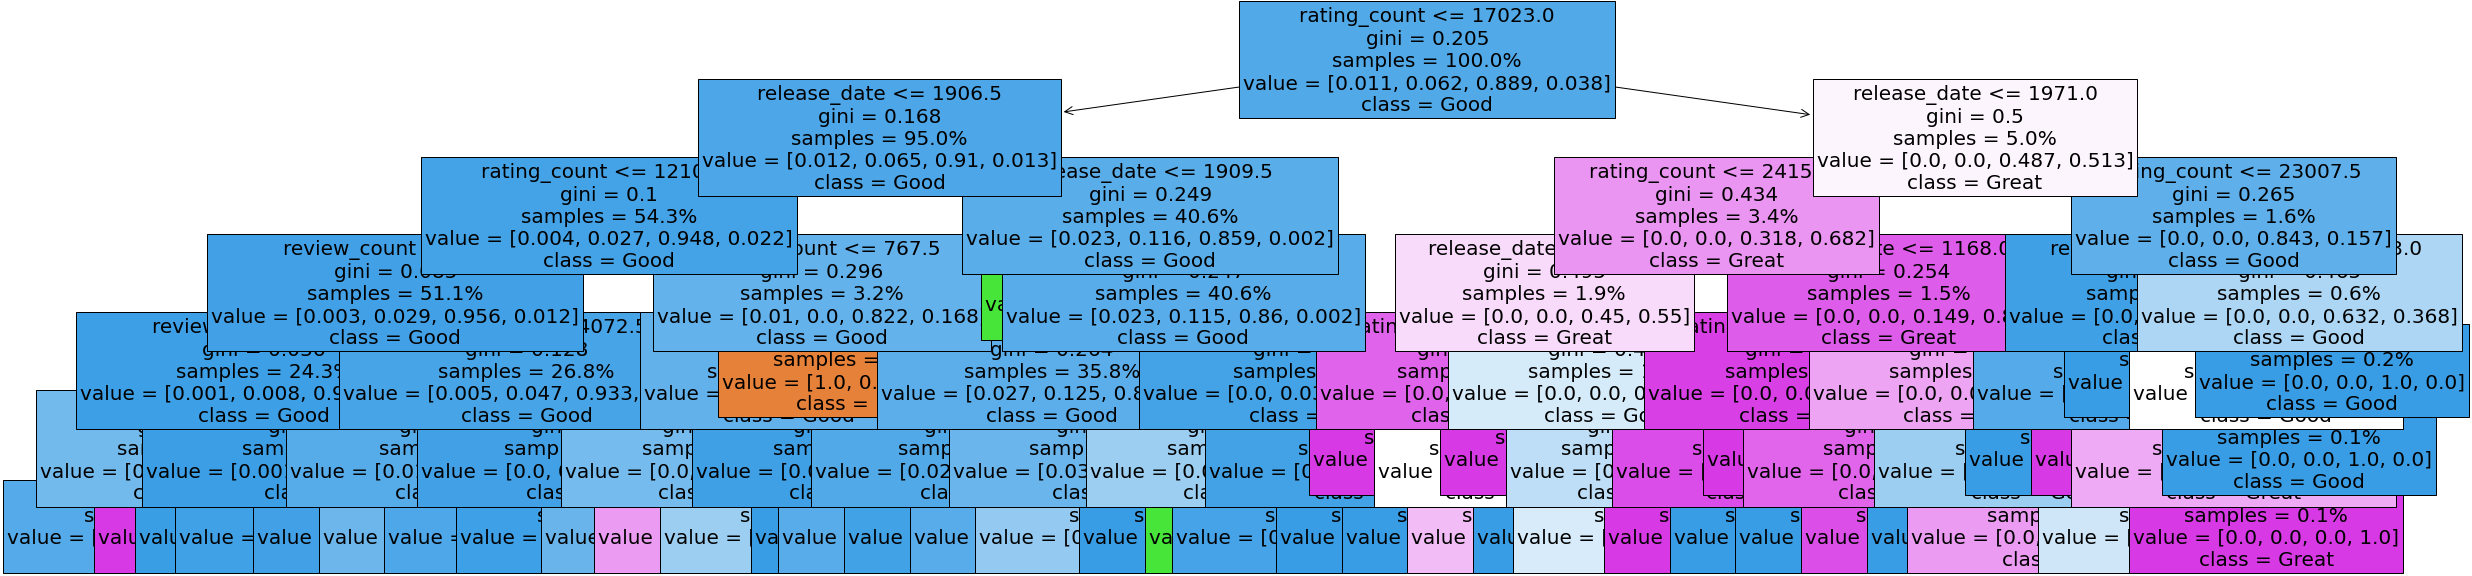

In [66]:
def myplot_tree_imb(dtree_imbal_best,X,y_imbalanced,class_names=['Bad','Medriocre','Good','Great']):
 # Export decision tree to DOT format
    dot_data_imb = export_graphviz(dtree_imbal_best, out_file=None,
    feature_names=X.columns, 
    class_names=class_names,
    filled=True, rounded=True, 
    special_characters=True)
  
    
    # Plot decision tree in pdf file
    graph = graphviz.Source(dot_data_imb)
    graph.render("Decision_tree-albums_imbalanced dataset") # save to file
    graph.view() # open in viewer
    
    
    # plot tree within jupyter notebook
    
    plt.figure(figsize=(40,10))
    plot_tree(dtree_imbal_best, filled=True, fontsize=20, feature_names=X.columns, proportion=True, class_names=class_names)
  # plt.title("\nDecision tree trained with the best parameters\n")
    display(Markdown("#### **Decision tree trained with the best parameters for imbalanced target**"))
    print()


  
    plt.show()

myplot_tree_imb(dtree_imbal_best,X_train,y_train)   

#### We wil now build the tree by using the **'y'**  set as target, which is built on the **'numerical_rating'** variable that was balanced by using quantiles. With this we will try to evaluate how the imbalanced target affected the accuracy of the decision tree. 

First check out how Accuracy depends on decision tree depth and minimum number of samples in split for the balanced **'numerical_rating'** target.


Splitting criterion:  gini


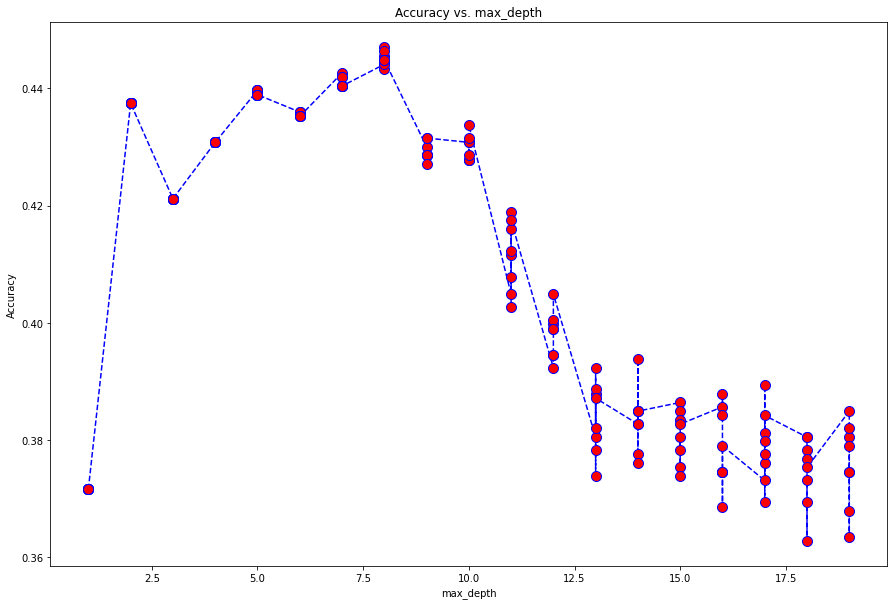

In [67]:
# apply decision tree for a range of maximum depth between 1 and 20 
# and a minimum number of samples in split between 2 and 10
# print accuracy

x_values = []
y_values = []
classif_score=[]
for i in range (1,20):
    for j in range (2,10):
        # Create the classifier
        dtree = DecisionTreeClassifier(max_depth=i, min_samples_split=j)
    
        # Train the classifier on the training set
        dtree.fit(X_train,y_train)
        
        # Validate the classifier on the testing set using classification accuracy
        y_pred = dtree.predict(X_test)
        
        classif =accuracy_score(y_test,y_pred)
       
        # Append x and y values to the lists
        x_values.append(i)
        y_values.append(classif)
        
        # Append max_depth, min_samples_split, accuracy to the list
        classif_score.append((i, j,classif))
    
     #   print( classif_score)
        
# checking the split criterion of DecisionTreeClassifier
print('\nSplitting criterion: ',dtree.criterion)  

# plotting how accuracy cahnges with max_depth for different min_samples_split       
plt.figure(figsize=(15, 10))
plt.plot(x_values,y_values ,color='blue', linestyle='dashed', marker='o', 
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

    

In [68]:
best_accuracy = max(classif_score, key=lambda x: x[2])
best_max_depth = best_accuracy[0]
best_min_samples_split = best_accuracy[1]

print("Best max_depth:", best_max_depth)
print("Best min_samples_split:", best_min_samples_split)
print("Best accuracy:", best_accuracy[2])


Best max_depth: 8
Best min_samples_split: 3
Best accuracy: 0.44707623982235384


In [69]:

# Create the classifier with the Best max_depth: 2 and Best min_samples_split: 2
dtree_best = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split= best_min_samples_split)

# Train the classifier on the training set
dtree_best.fit(X_train,y_train)

pred = dtree_best.predict(X_test)
ac_s = accuracy_score(y_test,pred)
print ('\nAccuracy score = ', ac_s, '\n')
classes = dtree_best.classes_
print ('Classes = ', classes, '\n')
print(X)




Accuracy score =  0.4448556624722428 

Classes =  [1 2 3 4] 

      release_date  rating_count  review_count
1             1593         61658           751
2              356         60192          1557
3             1085         53174          1264
4             2253         52149           638
5             2053         51335           752
...            ...           ...           ...
4995          2005          2171            63
4996          1662          2170            20
4997          2511          2170            21
4998           233          2169            39
4999           527          2169            51

[4503 rows x 3 columns]


#### Building the decision tree with the chosen parameters:

#### **Decision tree trained with the best parameters**

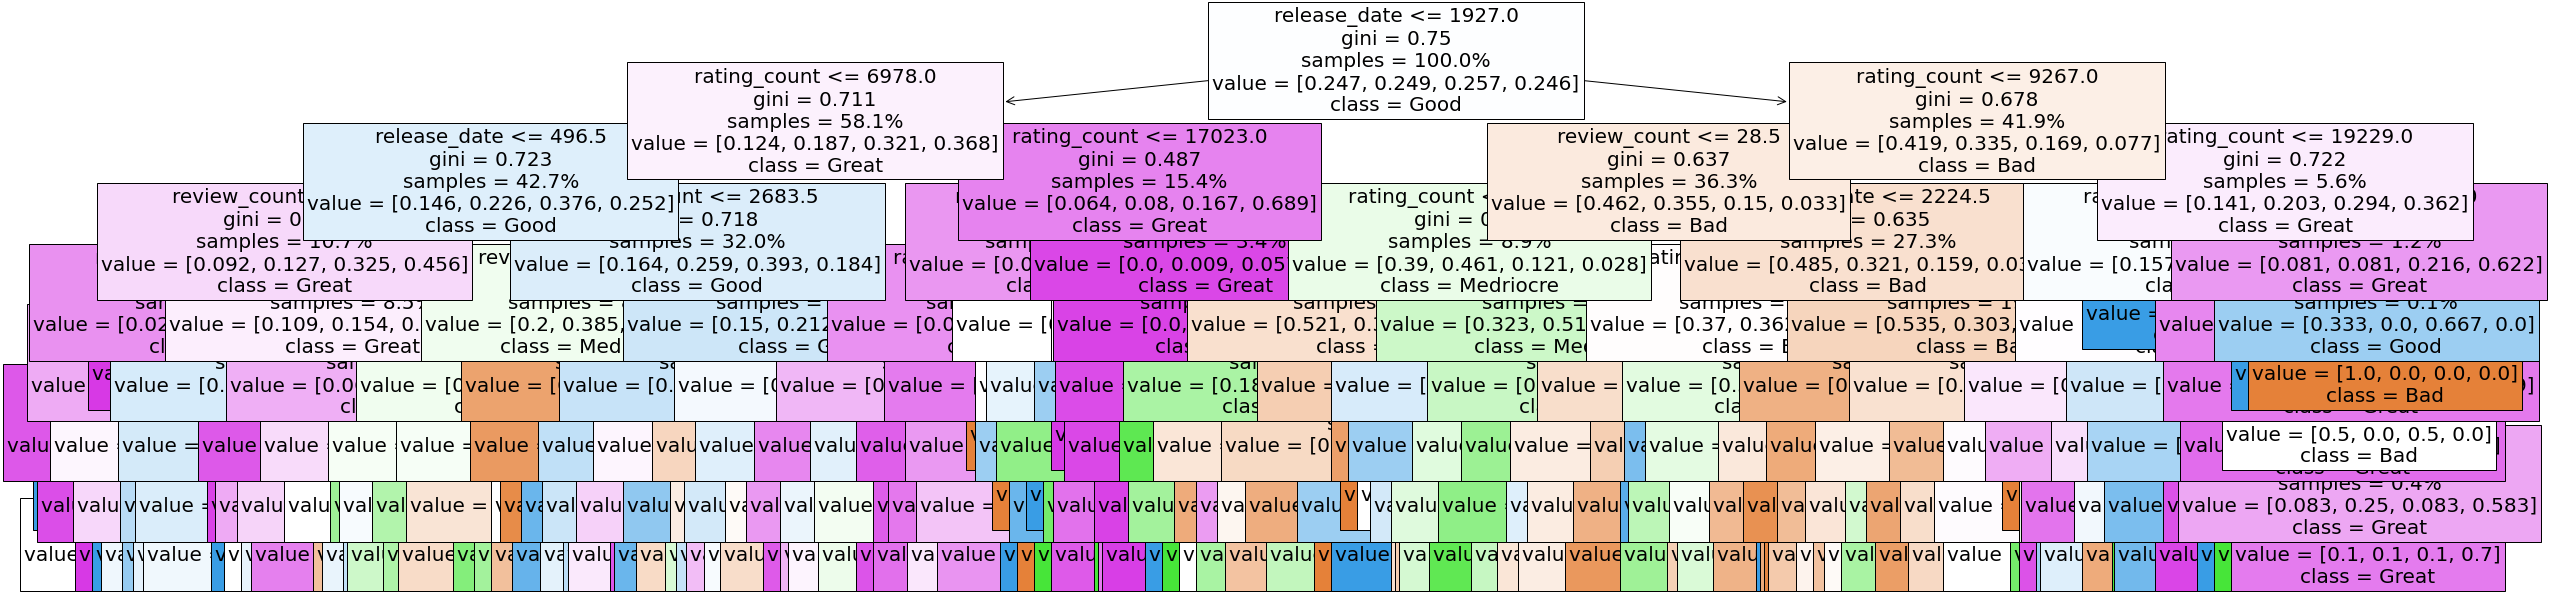

In [70]:
def myplot_tree(dtree_best,X,y,class_names=['Bad','Medriocre','Good','Great']):
 # Export decision tree to DOT format
    dot_data = export_graphviz(dtree_best, out_file=None,
    feature_names=X.columns, 
    class_names=class_names,
    filled=True, rounded=True, 
    special_characters=True)
  
    
    # Plot decision tree in pdf file
    graph = graphviz.Source(dot_data)
    graph.render("Decision_tree-albums dataset") # save to file
    graph.view() # open in viewer
    
    
    # plot tree within jupyter notebook
    
    plt.figure(figsize=(40,10))
    plot_tree(dtree_best, filled=True, fontsize=20, feature_names=X.columns, proportion=True, class_names=class_names)
  # plt.title("\nDecision tree trained with the best parameters\n")
    display(Markdown("#### **Decision tree trained with the best parameters**"))
    print()


  
    plt.show()

myplot_tree(dtree_best,X_train,y_train)   


In [71]:
# another way to build the tree within the notebook
"""

class_names=['Bad','Medriocre','Good','Great']
export_graphviz(dtree_best,'dtree_best.dot', feature_names=X.columns, class_names=class_names,
    filled=True, rounded=True, 
    special_characters=True)
    

! dot -Tpng dtree_best.dot -o tree.png 
    
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (15, 15))
plt.imshow(img)

"""

"\n\nclass_names=['Bad','Medriocre','Good','Great']\nexport_graphviz(dtree_best,'dtree_best.dot', feature_names=X.columns, class_names=class_names,\n    filled=True, rounded=True, \n    special_characters=True)\n    \n\n! dot -Tpng dtree_best.dot -o tree.png \n    \nimport cv2\n%matplotlib inline\nimg = cv2.imread('tree.png')\nplt.figure(figsize = (15, 15))\nplt.imshow(img)\n\n"

We will now try a different approach to divide the data in train and test subsets, to see if we can improve the accuracy.

We will divide the data by using a a **cross-validation** with **10 folds** and varying the **depth** and **number of features** in the decision tree with a '**grid-search'** approach.

In [72]:

DTClassifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5,6,7,8, 9, 10],
                  'max_features': [1, 2, 3]}

cross_validation = StratifiedKFold(n_splits=10, shuffle=True, random_state= 42)

print('Wait until it finishes...\n')
grid_search = GridSearchCV(DTClassifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

# Calculate the cross validation scores to have an idea of the performance during learning h the 10 folds
cv_scores = cross_val_score(grid_search, X_train, y_train, cv=10, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print('Cross-validation scores:', cv_scores)
print('Mean CV score:', mean_cv_score)
print('Standard deviation of CV scores:', std_cv_score)


grid_search.fit(X, y)
print('\nBest score: {}'.format(grid_search.best_score_))
print('\nBest parameters: {}'.format(grid_search.best_params_))
print('\nFinished!')


Wait until it finishes...

Cross-validation scores: [0.49050633 0.44303797 0.47936508 0.45079365 0.45079365 0.44444444
 0.41904762 0.49206349 0.43174603 0.44761905]
Mean CV score: 0.4549417319670484
Standard deviation of CV scores: 0.0232502058823526

Best score: 0.4574653855629466

Best parameters: {'max_depth': 3, 'max_features': 3}

Finished!


#### Let's look at the heatmap for the accuracy score obtained for the cross validation results

Text(33.0, 0.5, 'max_depth')

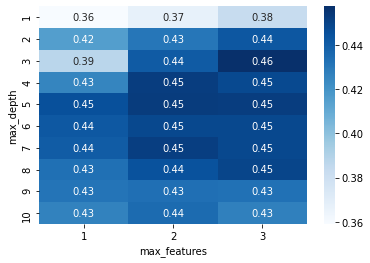

In [73]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (10, 3)
sns.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(3) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(10) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')


#### Let´s perform a cross validation to investigate also how the splitting criterion, the splitterand the minumum number of samples per split affect the decision tree.

In [74]:
best_DTC = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5,6,7,8,9,10],
                  'max_features': [1, 2, 3],
                'min_samples_split': [2,3,4,5,6,7,8,9,10]}

print('Wait until it finishes...\n')
cross_validation = StratifiedKFold(n_splits=10)

grid_search_new = GridSearchCV(best_DTC,
                           param_grid=parameter_grid,
                           cv=cross_validation)


# Calculate the cross validation scores to have an idea of the performance during learning the 10 folds
cv_scores_new = cross_val_score(grid_search_new, X_train, y_train, cv=10, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score_new = cv_scores_new.mean()
std_cv_score_new = cv_scores_new.std()

print('Cross-validation scores:', cv_scores_new)
print('Mean CV score:', mean_cv_score_new)
print('Standard deviation of CV scores:', std_cv_score_new)


grid_search_new.fit(X, y)

print('\nBest score: {}'.format(grid_search_new.best_score_))
print('\nBest parameters: {}'.format(grid_search_new.best_params_))
print('\nFinished!')


Wait until it finishes...

Cross-validation scores: [0.45253165 0.43987342 0.43174603 0.45396825 0.44761905 0.41904762
 0.43174603 0.46349206 0.43492063 0.45079365]
Mean CV score: 0.4425738396624473
Standard deviation of CV scores: 0.012702014835637383

Best score: 0.42307119980290714

Best parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 2, 'min_samples_split': 9, 'splitter': 'random'}

Finished!


#### By using the Best Parameters obtained in Cross Validadtion above, we will train the data to get a new decision tree.

#### **Decision tree trained with the best parameters**

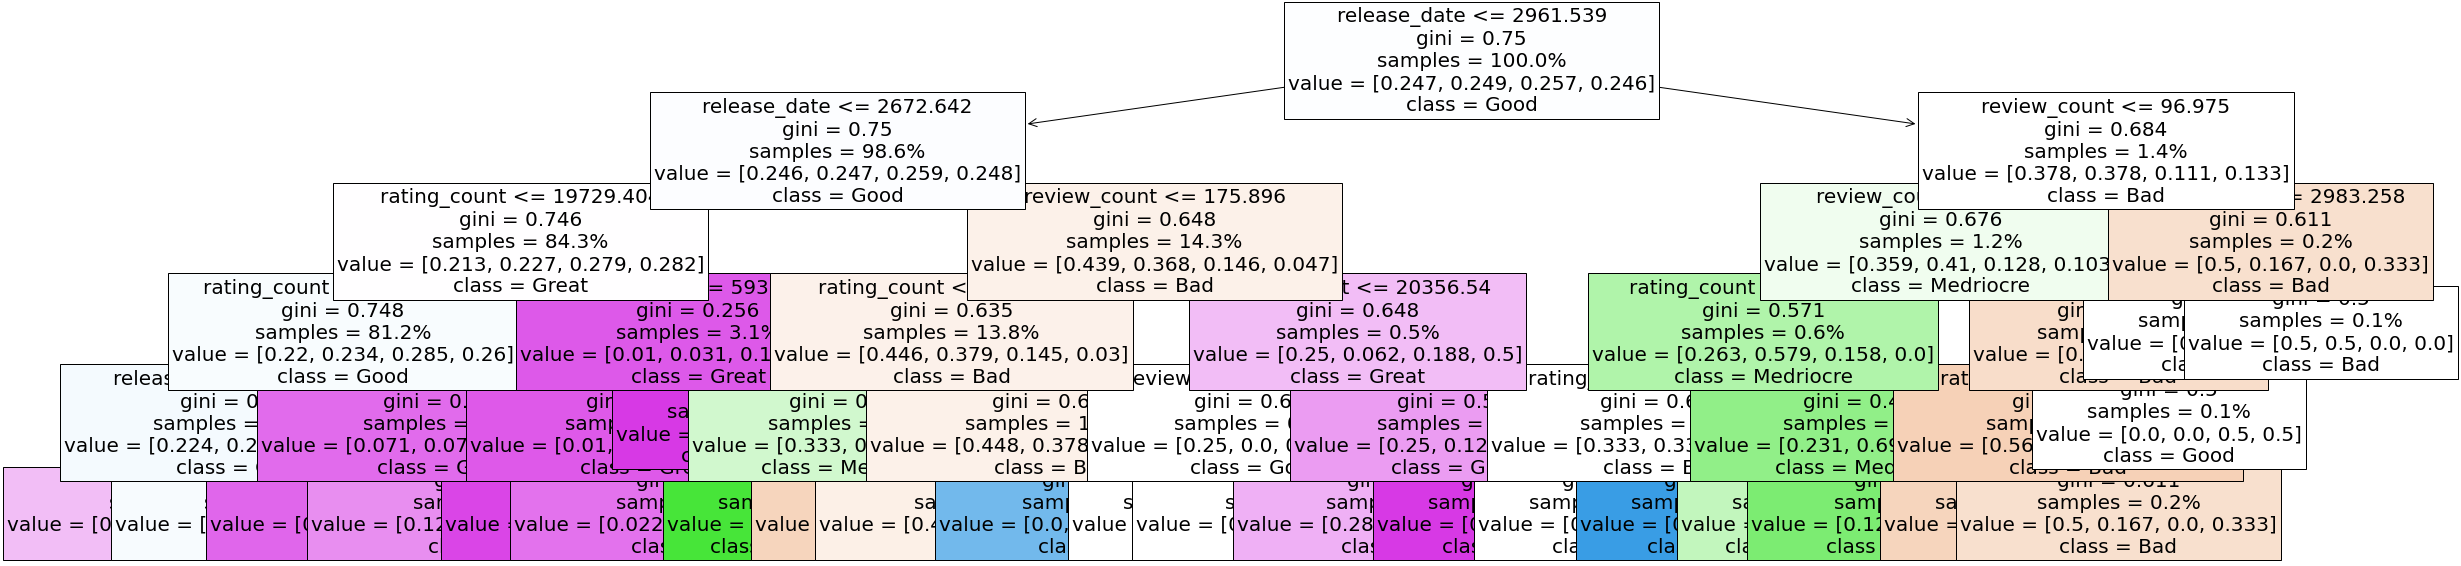

In [75]:

# Create the classifier
best_CV_DT = DecisionTreeClassifier(max_depth=5,min_samples_split= 6, max_features= 2,splitter='random',criterion='gini')

# Train the classifier on the training set
best_CV_DT.fit(X_train, y_train)


 # Validate the classifier on the testing set 
y_pred_new = best_CV_DT.predict(X_test)
#acc = accuracy_score(y_test,y_pred_new)
#print('\nAccuracy = ', acc)

#classif_new =accuracy_score(y_test,y_pred_new)


# visualize the decision tree



myplot_tree(best_CV_DT,X_train,y_train) 


### Evaluation metrics for the Decision Tree bulit with the best hyperparameters 

#### Accuracy Score, Precision, Recall and F1-score

In [76]:
# function to get the metrics

def model_metrics(model, y_test, prediction, average):
    modelMetrics = []
    accur = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction, average=average)
    recall = recall_score(y_test, prediction, average=average)
    f1 = f1_score(y_test, prediction, average=average)
    
    modelMetrics = [accur,precision,recall,f1]
    print('\nAccuracy = ', modelMetrics[0])
    print('\nPrecision = ', modelMetrics[1])
    print('\nRecall = ', modelMetrics[2])
    print('\nF1-score = ', modelMetrics[3])
    
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

    values = [accur, precision, recall, f1]
    
    # Create bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
    plt.ylabel('Score')
    plt.ylim([0, 0.5])
    plt.title(f'Performance for {model}')
                 
    # Display the plot
    plt.show()
   
    display(Markdown(f"#### **Accuracy <font color='blue'> {accur:.2f} </font>**  |   **Precision <font color='orange'> {precision:.2f} </font>** |  " 
                 f"**Recall <font color='green'> {recall:.2f} </font>**  |   **F1-Score <font color='red'> {f1:.2f} </font>**."))



Accuracy =  0.35011102886750556

Precision =  0.3306863854650518

Recall =  0.35011102886750556

F1-score =  0.2964538654235582


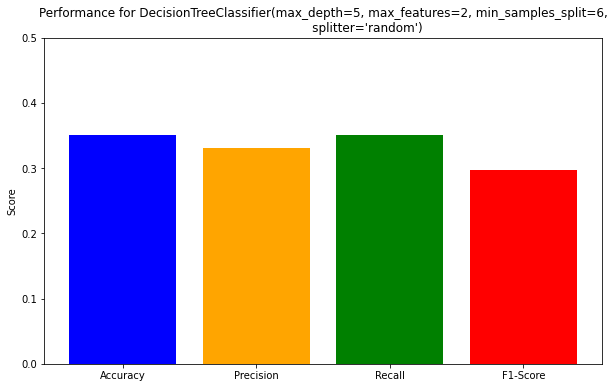

#### **Accuracy <font color='blue'> 0.35 </font>**  |   **Precision <font color='orange'> 0.33 </font>** |  **Recall <font color='green'> 0.35 </font>**  |   **F1-Score <font color='red'> 0.30 </font>**.

In [79]:
# calculating the metrics for the best_CV_DT

average = 'weighted'
model= best_CV_DT
model_metrics(model, y_test, y_pred_new, average)



#### Confusion matrix

[[ 82   2 241  10]
 [ 63   0 252  22]
 [ 25   2 268  52]
 [ 10   0 199 123]]


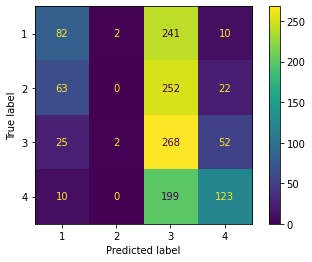

In [80]:
cm_DT=confusion_matrix(y_test,y_pred_new)
print(cm_DT)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=best_CV_DT.classes_)
disp.plot()

Best values of **True label** ***vs.*** **Predicted label** are found for **class 3**, which corresponds to the rating **"Good"**.

Worse values of **True label** ***vs.*** **Predicted label** are found for **class 1**, which corresponds to the rating **"Bad"**.

<a id="KNN"></a>

##  5.2. K-Nearest Neighgors (KNN) Algorithm

[[ go back to the top ]](#Index)



The KNN algorithm is a supervised learning algorithm too and can be used for regression and classification problems, like decision trees. 

It is based on the idea that the observations closest to a given data point are the most "similar" observations in a data set, and we can therefore classify unforeseen points based on the values of the closest existing points. 
By choosing K, we can select the number of nearby observations to use in the algorithm.

The choice of the value k is an important parameter in the algorithm. A smaller value of k may lead to more flexible boundaries between classes but can be more sensitive to noise or outliers. On the other hand, a larger value of k may result in smoother decision boundaries but can potentially blur the distinctions between different classes.


### Finding the best K value for the KNN algorithm

In [81]:
#_knn = df.drop(["release_name", "secondary_genres","descriptors", "avg_rating", "rating", "numerical_rating"], axis=1)
#y_knn = df['numerical_rating']

#X_train_knn,X_test_knn,y_train_knn,y_test_knn = train_test_split(X_knn, y_knn, test_size= 0.3, random_state=1234, stratify = y)
#X_train,X_test,y_train,y_test = train_test_split(X, y, test_size= 0.3, random_state=1234, stratify = y)

def find_best_k(x_train, y_train, x_test, y_test, min_k=1, max_k=50):
    accuracies = []
    for k in range(min_k, max_k+1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        preds = knn.predict(x_test)
        accuracy = accuracy_score(y_test, preds)
        accuracies.append(accuracy)
    best_k = accuracies.index(max(accuracies)) + min_k
    return best_k, accuracies

#### **The best value for k is : <font color='green'> 19 </font>**

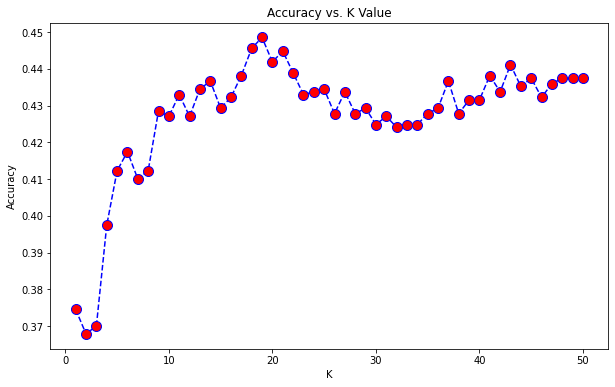

In [82]:
best_k, accuracies = find_best_k(X_train, y_train, X_test, y_test)

# plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), accuracies, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
display(Markdown(f"#### **The best value for k is : <font color='green'> {best_k} </font>**" ))

### Comparing the Cross-validation scores of different K values

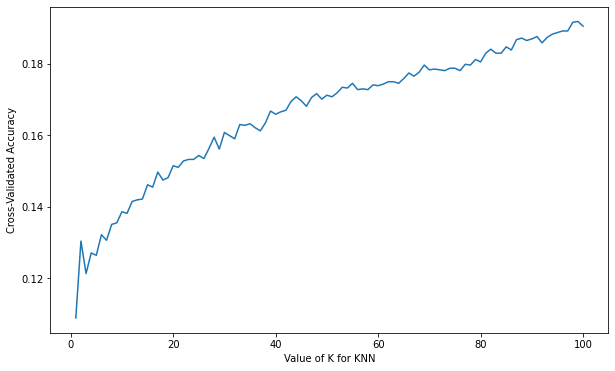

In [83]:
k_values = list(range(1, 101))

avg_scores = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    avg_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


### Building the KNN model with the chosen K value

The performance of kNN can be influenced by the scaling of the features and the choice of the distance metric. Therefore, we will perform the scalling of the data before training the data.


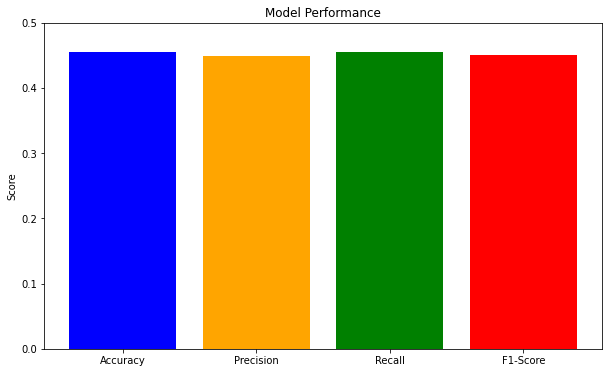

#### **Accuracy <font color='blue'> 0.46 </font>**  |   **Precision <font color='yellow'> 0.45 </font>** |  **Recall <font color='green'> 0.46 </font>**  |   **F1-Score <font color='red'> 0.45 </font>**.

In [84]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=best_k)
model = knn.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

values = [accuracy, precision, recall, f1]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Score')
plt.ylim([0, 0.5])
plt.title('Model Performance')

# Display the plot
plt.show()
display(Markdown(f"#### **Accuracy <font color='blue'> {accuracy:.2f} </font>**  |   **Precision <font color='yellow'> {precision:.2f} </font>** |  " 
                 f"**Recall <font color='green'> {recall:.2f} </font>**  |   **F1-Score <font color='red'> {f1:.2f} </font>**."))


The **metrics values** obtained in the **k-Nearest Neighbors** classifier are **similar** to those found in the improved **Decision Tree*, for the balance target (y). 

[[179  87  46  23]
 [120  84  95  38]
 [ 45  69 156  77]
 [ 17  35  84 196]]


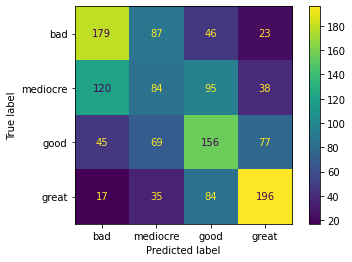

In [85]:
knn_confusion_matrix = confusion_matrix(y_test, predictions)
print(knn_confusion_matrix)

show_cf = ConfusionMatrixDisplay(confusion_matrix=knn_confusion_matrix,
                display_labels= ['bad','mediocre','good','great'])
show_cf.plot()



Best values of **True label** ***vs.*** **Predicted label** are found for **class 4**, which corresponds to the rating **"Great"**. This is **different** from the confusion matrix obtained for the best decision tree.

Worse values of **True label** ***vs.*** **Predicted label** are found for **class 1**, which corresponds to the rating **"Bad"**.

<a id="Conclusions"></a>

# 6. Conclusions

[[ go back to the top ]](#Index)

### Decision Tree Classifier

Based on the results obtained, we concluded that the performance of the decision tree model was affected by the **imbalance of the classes** in the initial dataset. With the **imbalanced dataset**, the model **accuracy** was **0.89**. When we divided the class by quantiles, we observed a considerable **reduction in accuracy**, reaching **0.44**.

After experimenting different values of **max_depth** and **min_samples_split** in the decision tree, we concluded that the best parameters for the model were **max_depth = 8** and **min_samples_split = 2**.

We also applied the **Grid Search technique with cross-validation** to compare the parameters of the decision tree. We observed that the best parameters identified were **'max_depth' = 5, 'max_features' = 2, 'criterion' = 'gini', 'min_samples_split' = 6, 'splitter' = 'random'**.

The metrics obtained on the **Decision Tree Classifier** by using these best parameters were **Accuracy 0.35, Precision 0.33, Recall 0.35, F1-Score 0.30**.

From the confusion matrix of the **Decision Tree Classifier** by using these best parameters, we can conclude that:

    - Best values of **True label** ***vs.*** **Predicted label** are found for **class 3**, which corresponds to the rating **"Good"**.

    - Worse values of **True label** ***vs.*** **Predicted label** are found for **class 1**, which corresponds to the rating **"Bad"**.

### k-Nearest Neighbors (kNN) Classifier

For the **k-Nearest Neighbors (kNN) algorithm** we evaluated the best value of k that yielded the best accuracy. This was founf for  **k=19**.

By using **cross-validation** we observe that the accuracy of the kNN tends to **increase as the value of k increases**.
Initially, with low values of k, **the model tends to overfit** the training data, resulting in a low generalization capacity and, consequently, lower average accuracy in cross-validation.

The metrics obtained on **k-NN** were **Accuracy 0.46, Precision 0.45, Recall 0.46, F1-Score 0.45**. Compared to the metrics from the decision trees model, the values are quite **similar**, with the **kNN being better**.

From the confusion matrix of the **k-Nearest Neighbors** we can conclude that:

    - Best values of **True label** ***vs.*** **Predicted label** are found for **class 4**, which corresponds to the rating **"Great"**. This is **different** from the confusion matrix obtained for the decision tree with the best parameters.

    - Worse values of **True label** ***vs.*** **Predicted label** are found for **class 1**, which corresponds to the rating **"Bad"**, and was similar to what was found for the decision tree with the best parameters.

<a id="Log_changes"></a>
##  7. Log Changes

[[ go back to the top ]](#Index)

Initial data set: **df** 

Dropped missing values in : **primary_genres, secondary_genres**

Changed column type: **'release_name', 'artist_name','primary_genres', 'secondary_genres', 'descriptors'** from object to int

Added columns: **'rating'**, **'numerical_rating'**, **'rating_imbal'**, **'numerical_rating_imbal'**

Dropped columns: **'release_name', 'artist_name', 'primary_genres', 'secondary_genres', 'descriptors', 'avg_rating', 'rating_imbalanced', 'rating'**




<a id="References"></a>
##  8. References

[[ go back to the top ]](#Index)

Dataset from: https://www.kaggle.com/datasets/tobennao/rym-top-5000   

Moreira JM, de Carvalho ACPLF and Horvát T. A General Introduction to Data Analytics. 2018. Wiley (editors). 10.1002/9781119296294. 

Exploratory data analysis: https://www.ibm.com/cloud/learn/exploratory-data-analysis 

Preprocessing: https://towardsdatascience.com/data-pre-processing-a-step-by-step-guide-541b083912b5 

DataCamp: https://app.datacamp.com/ 

Kingsford C, Salzberg SL. What are decision trees? Nat Biotechnol. 2008 Sep;26(9):1011-3. doi: 10.1038/nbt0908-1011. PMID: 18779814; PMCID: PMC2701298.

STAT 479: Machine Learning Lecture Notes. Sebastian Raschka. Department of Statistics University of Wisconsin–Madison.
https://sebastianraschka.com/pdf/lecture-notes/stat479fs18/02_knn_notes.pdf

Scikit-learn documentation: http://scikit-learn.org/stable/modules/neighbors.html Section “1.6.4. Nearest Neighbor Algorithms”
